# Random Forest Classifier

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Information collected from dataset

In [2]:
df=pd.read_csv('breast_cancer.csv',header=None)
print(df.head())

        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       699 non-null    int64 
 1   1       699 non-null    int64 
 2   2       699 non-null    int64 
 3   3       699 non-null    int64 
 4   4       699 non-null    int64 
 5   5       699 non-null    int64 
 6   6       699 non-null    object
 7   7       699 non-null    int64 
 8   8       699 non-null    int64 
 9   9       699 non-null    int64 
 10  10      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### There are '?' for missing values as mentioned in the README.md file in column Bare Nuclei

In [5]:
missing_counts=(df== '?').sum()
print(missing_counts)

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64


## Making data more meaningful by adding column names

In [6]:
column_names = [
    'Sample code number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class'
]
df.columns = column_names
print("DataFram with meaningful column names:")
print(df.head())


DataFram with meaningful column names:
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1    

## Exploratory Data Analysis

<Axes: >

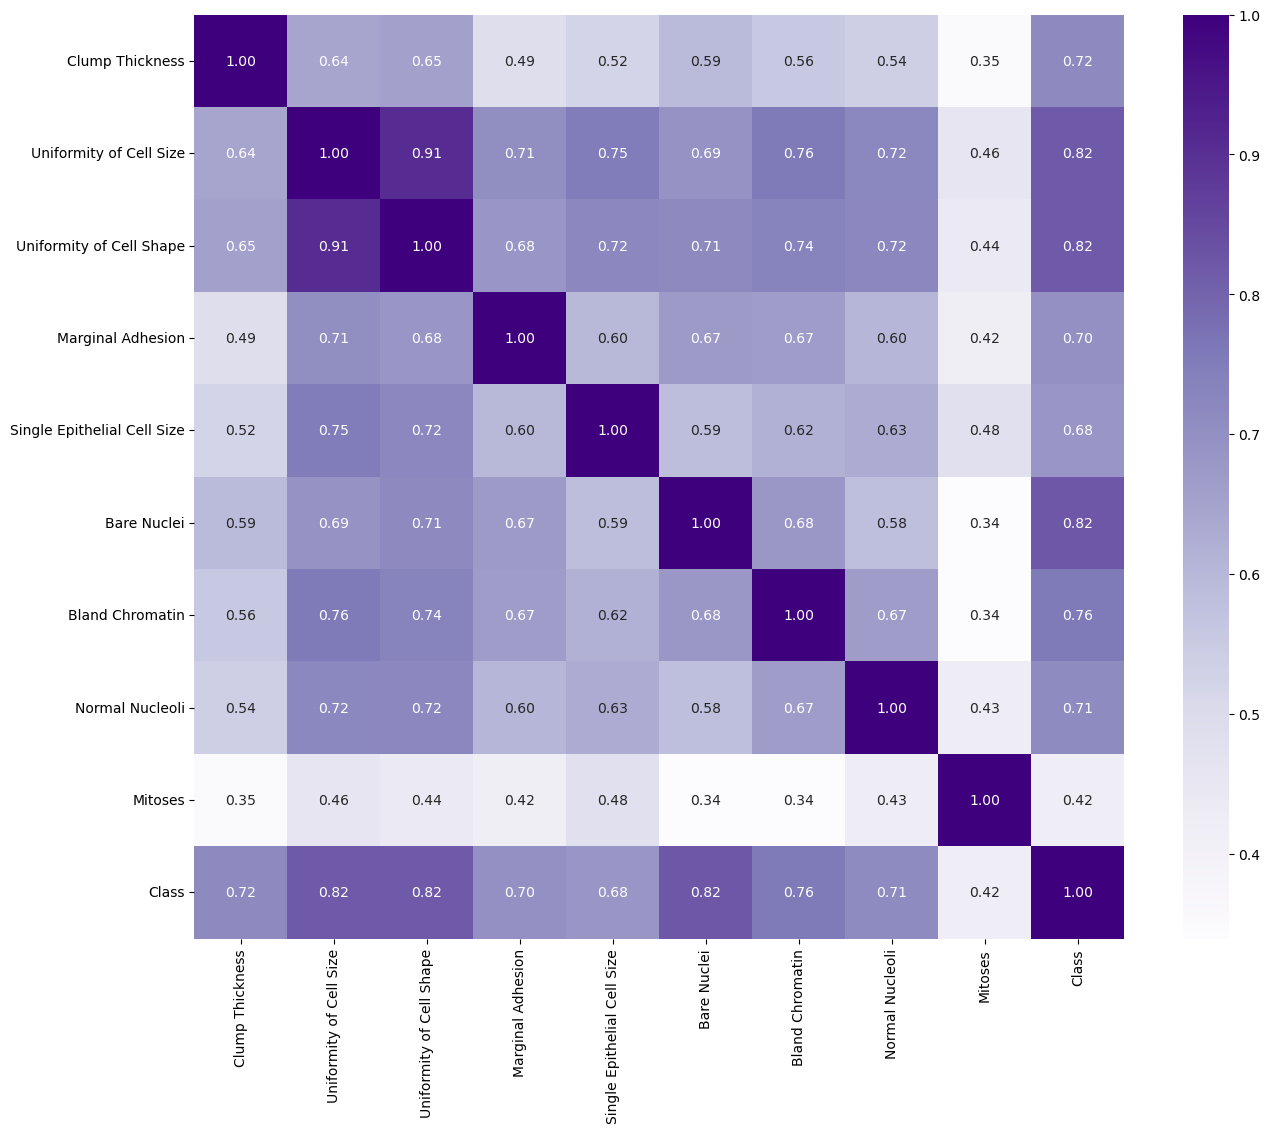

In [7]:
plt.figure(figsize=(15,12))
df.replace('?',np.nan,inplace=True)
correlation=df.corr()
columns_to_drop=['Sample code number']
reduced_correlation = correlation.drop(columns=columns_to_drop, index=columns_to_drop)
sns.heatmap(reduced_correlation,fmt='.2f',annot=True,cmap='Purples',cbar=True)

**We see high correlation in the columns (Uniformity of cell size, uniformity of cell shape,bare nuclei,bland chromatin)**

 **We also see extremely high correlation between uniformity of cell size and uniformity of cell shape which results in the model being unstable, So we drop uniformity of cell shape as it makes the model more stable**

# Replacing missing values

In [8]:
df.replace('?',np.nan,inplace=True)
missing=(df==np.nan).sum()
print(missing)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [9]:
X=df.iloc[:,:-1]
X=X.drop('Uniformity of Cell Shape',axis=1)
y=df.iloc[:,-1].values
X=np.array(X)
imputer=SimpleImputer(missing_values =np.nan,strategy='mean')
imputer.fit(X[:,5:6])
X[:,5:6]=imputer.transform(X[:,5:6])


## Splitting the data into training and test set

In [10]:
X=X[:,1:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Implementing Feature Scaling using Standard Scaler

In [11]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Using Logistic Regression to classify the results into Benign(2) or Malignant(4)

In [53]:
classifier=RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

,n_estimators,30
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[2 2]
 [2 2]
 [2 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]]


## Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

Text(95.72222222222221, 0.5, 'Malignant                         Benign')

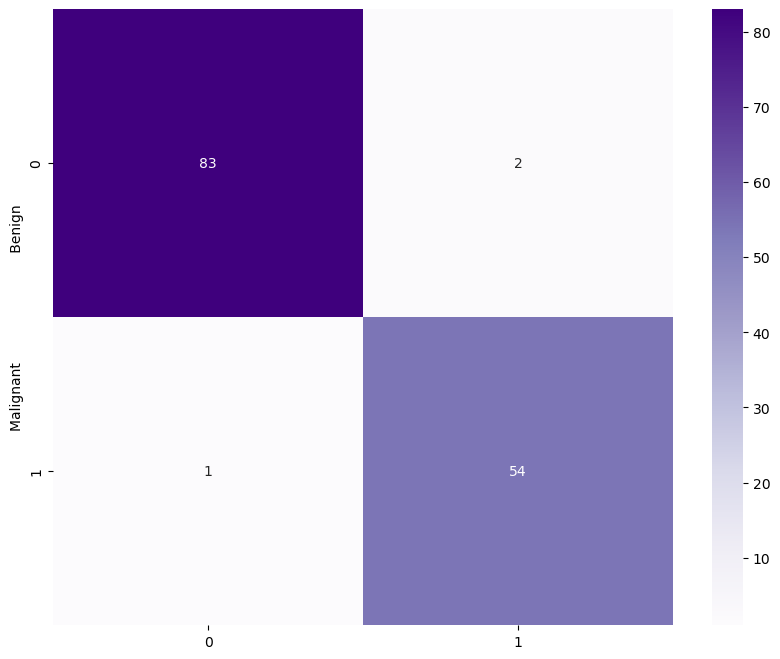

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Purples',cbar=True)

plt.ylabel('Malignant                         Benign')

## Calculating Accuracy Score using K-Fold cross Validation with n=10 folds

In [57]:
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:-.2f} %".format(accuracies.std()*100))

Accuracy: 96.96 %
Standard Deviation: 2.77 %


### Random Forest classification gives us the best result with 97% accuracy with a standard deviation of 2.77% . There were 2 false negatives and 1 false positive